In [1]:
import pandas as pd

def read_csv_as_dataframe(filepath):
    # Read the CSV file without headers
    df = pd.read_csv(filepath, header=None)

    # Use the first column as the header
    headers = df.iloc[:, 0]  # Extract the first column as headers
    df = df.iloc[:, 1:]      # Remove the first column from the df
    df = df.T
    df.columns = headers     # Set the extracted column as headers

    return df

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_columns_of_dataframe(df, x_coords, mode='normal'):
    # Check if the length of x_coords matches the number of rows in the DataFrame
    if len(x_coords) != len(df):
        raise ValueError("Length of x_coords must match the number of rows in the DataFrame")

    plt.figure(figsize=(10, 6))

    # Loop through each column in the DataFrame and plot
    for column in df.columns:
        plt.plot(x_coords, df[column], label=f'Column: {column}')

    if mode == 'log':
        plt.yscale('log')

    plt.title('Voxels intensity distribution')
    plt.xlabel('Voxels intensity')
    plt.ylabel('Voxels count')
    plt.show()

In [6]:
#read csv
csv_path = r"d:\Kananat\Data\Last0\2_Masked\voxel_intensity.csv"
csv_df = read_csv_as_dataframe(csv_path)

98
(98, 407)


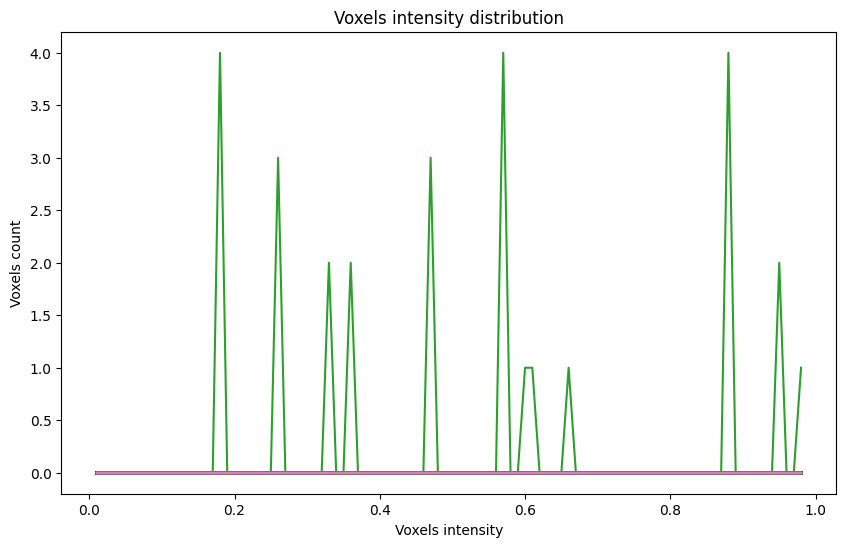

In [7]:
import numpy as np

minimum = 0.01
maximum = 0.99

row_min = int(minimum/0.01)
row_max = int(maximum/0.01)

x_coords_min = minimum
x_coords_max = maximum

cut_df = csv_df.iloc[row_min:row_max, :]
x_coords = np.arange(x_coords_min, x_coords_max, 0.01)
print(len(x_coords))
print(cut_df.shape)

plot_columns_of_dataframe(cut_df, x_coords, mode='normal')

(799, 407)
(200,)


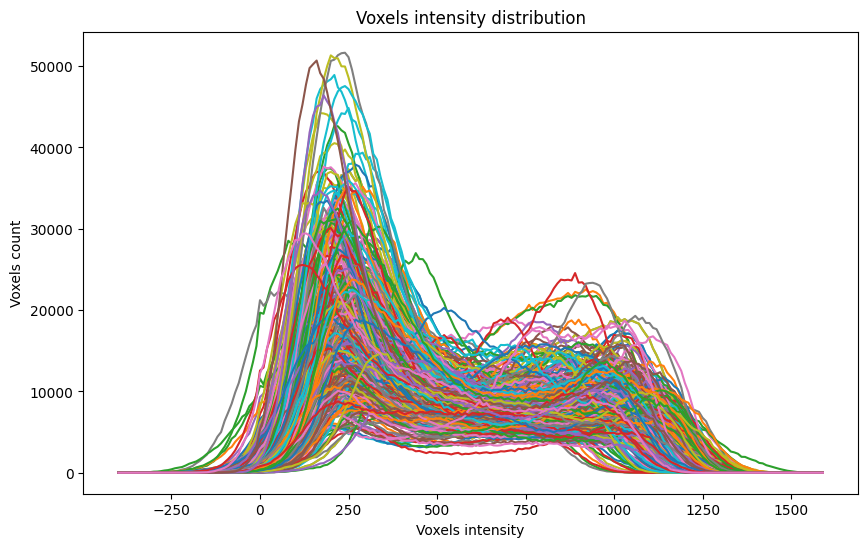

In [35]:
import numpy as np

csv_path = r"d:\Kananat\Data\Last0\2_Masked\voxel_intensity.csv"
csv_df = read_csv_as_dataframe(csv_path)
print(csv_df.shape)

minimum = -400
maximum = 1600

row_min = int((minimum+4000)/10)
row_max = int((maximum+4000)/10)

x_coords_min = minimum
x_coords_max = maximum-9

cut_df = csv_df.iloc[row_min:row_max, :]
x_coords = np.arange(x_coords_min, x_coords_max, 10)
print(x_coords.shape)
plot_columns_of_dataframe(cut_df, x_coords, mode='normal')

98
(98, 395)


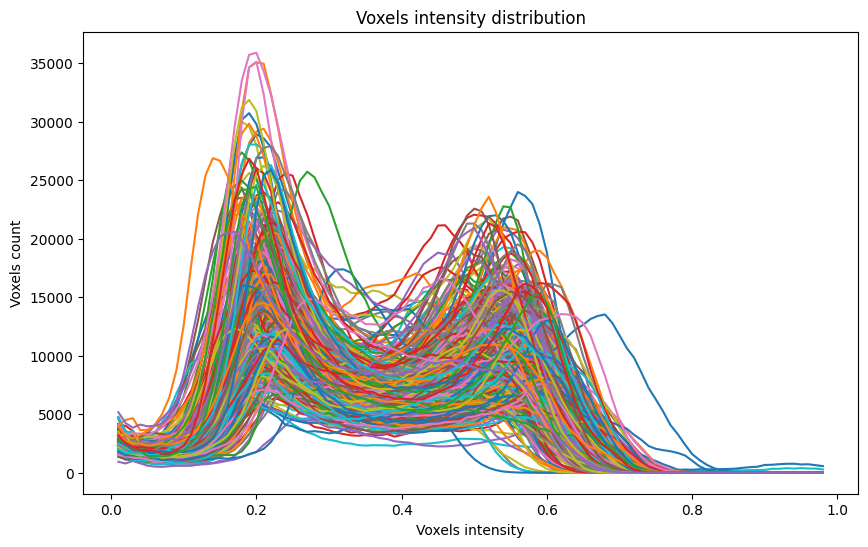

In [10]:
import numpy as np

minimum = 0.01
maximum = 0.99

row_min = int(minimum/0.01)
row_max = int(maximum/0.01)

x_coords_min = minimum
x_coords_max = maximum

cut_df = csv_df.iloc[row_min:row_max, :]
x_coords = np.arange(x_coords_min, x_coords_max, 0.01)
print(len(x_coords))
print(cut_df.shape)

plot_columns_of_dataframe(cut_df, x_coords, mode='normal')

In [5]:
import numpy as np

minimum = -40
maximum = 40

row_min = int((minimum+40)/0.1)
row_max = int((maximum+40)/0.1)

x_coords_min = minimum
x_coords_max = maximum

cut_df = csv_df.iloc[row_min:row_max, :]
x_coords = np.arange(x_coords_min, x_coords_max, 0.1)
print(len(x_coords))
print(cut_df.shape)

plot_columns_of_dataframe(cut_df, x_coords, mode='log')

800
(99, 407)


ValueError: Length of x_coords must match the number of rows in the DataFrame

In [6]:
import numpy as np

x_coords = np.arange(-4000, 3991, 10)
plot_columns_of_dataframe(csv_df, x_coords, mode='normal')

ValueError: Length of x_coords must match the number of rows in the DataFrame

In [ ]:
plot_columns_of_dataframe(csv_df, x_coords, mode='log')

In [ ]:
def set_first_non_zero_to_zero(column):
    # Find the first non-zero index
    first_non_zero_idx = column.ne(0).idxmax()
    # Check if the first non-zero index actually has a non-zero value (handles all-zero columns)
    if column[first_non_zero_idx] != 0:
        column.at[first_non_zero_idx] = 0
    return column

# Apply the function to each column
removed_background_df = csv_df.apply(set_first_non_zero_to_zero)

In [ ]:
import numpy as np

x_coords = np.arange(-4000, 3991, 10)
plot_columns_of_dataframe(removed_background_df, x_coords, mode='normal')

In [ ]:
plot_columns_of_dataframe(removed_background_df, x_coords, mode='log')

Can't remember what is the next part is for. Probably something relate to figuring out what each peak is

In [ ]:
import numpy as np
from kneed import KneeLocator
import matplotlib.pyplot as plt

# Finding the knee point in a decreasing curve
knee_locator = KneeLocator(x, y, curve='concave', direction='decreasing')

# Print the knee
print("Knee point at x =", knee_locator.knee)

# Optional: Visualize the plot
plt.figure(figsize=(8, 4))
plt.plot(x, y, 'bx-')
plt.vlines(knee_locator.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.xlabel('Data Points')
plt.ylabel('Metric')
plt.title('Knee Point Detection in Decreasing Data')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def plot_and_save_columns(df, directory):
    # Create the directory if it does not exist
    if not os.path.exists(directory):
        os.makedirs(directory)

    # Iterate over each column in the DataFrame
    for column in df.columns:
        plt.figure()  # Create a new figure for each plot
        plt.plot(df[column])
        plt.title(column)
        plt.xlabel('Voxels intensity')
        plt.ylabel('Voxels count')

        plt.yscale('log')

        # Save the plot to the specified directory with the column name as the filename
        plt.savefig(f'{directory}/{column}.png')
        plt.close()  # Close the figure to free up memory

# Example usage

In [ ]:
directory = r"C:\Users\acer\Desktop\Project\Code\Voxel_intensity_log"
plot_and_save_columns(removed_background_df, directory)  # Save plots in the 'plots' directory

In [ ]:
import imageio
import os

def create_gif(input_folder, output_file, duration=0.5):
    images = []
    # Loop through each file in the sorted list of files
    for file_name in sorted(os.listdir(input_folder)):
        if file_name.endswith('.png'):
            # Construct the full file path
            file_path = os.path.join(input_folder, file_name)
            # Read the file
            images.append(imageio.imread(file_path))
    # Write the images to a GIF file
    imageio.mimsave(output_file, images, duration=duration)

# Example usage
input_folder = r"C:\Users\acer\Desktop\Project\Code\Voxel_intensity_log"
output_directory = r"C:\Users\acer\Desktop\Project\Code\Voxel_intensity_log\output.gif"
create_gif(input_folder, output_directory, duration=2)

In [ ]:
import numpy as np

def select_data_points(x, y, threshold):
    """
    Selects a range of data points from the maximum y to the first y value 
    that is lower than the specified threshold.
    
    Args:
    x (np.array): The x-coordinates.
    y (np.array): The y-coordinates.
    threshold (float): The threshold value for y.
    
    Returns:
    tuple: Selected x and y values as numpy arrays.
    """
    # Find the index of the maximum y value
    max_y_index = np.argmax(y)

    # Find the first index from the max_y_index where y drops below the threshold
    first_below_threshold = np.where(y[max_y_index:] < threshold)[0][0] + max_y_index if np.any(y[max_y_index:] < threshold) else len(y)

    # Select the range of x and y values
    selected_x = x[max_y_index:first_below_threshold + 1]
    selected_y = y[max_y_index:first_below_threshold + 1]

    return selected_x, selected_y


In [ ]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([1, 3, 5, 10, 8, 6, 7, 2, 1, 0])
threshold = 3
selected_x, selected_y = select_data_points(x, y, threshold)
print("Selected x values:", selected_x)
print("Selected y values:", selected_y)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

def plot_and_save_selected_data(df, threshold, directory):
    """
    Iterates through each column of a DataFrame, applies select_data_points to each column,
    plots the selected points, and saves the plots to a specified directory.

    Args:
    df (pd.DataFrame): DataFrame containing the data.
    threshold (float): Threshold value to determine the cutoff in y-values.
    directory (str): Directory path to save the plots.
    """
    # Ensure the directory exists
    if not os.path.exists(directory):
        os.makedirs(directory)

    # Get the x-coordinates (index of the DataFrame)
    x = df.index.to_numpy()

    # Iterate through each column in the DataFrame
    for column in df.columns:
        try:
            # Ensure data is numeric
            y = df[column].to_numpy()
            
            # Apply the select_data_points function
            selected_x, selected_y = select_data_points(x, y, threshold)
            
            # Create a plot of the selected data points
            plt.figure()
            plt.plot(selected_x, selected_y)
            plt.title(column)
            plt.xlabel('Voxels intensity')
            plt.ylabel('Voxels count')

            plt.yscale('log')

            # Save the plot
            plt.savefig(f'{directory}/{column}.png')
            plt.close()  # Close the figure to free up memory
        except Exception as e:
            print(f"Failed to process column {column}: {e}")

In [ ]:
save_folder = r"C:\Users\acer\Desktop\Project\Code\From_max_to_10000_log"
plot_and_save_selected_data(removed_background_df, threshold=10000, directory=save_folder)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.signal import find_peaks

def plot_and_save_selected_data_with_local_maxima(df, threshold, directory):
    """
    Iterates through each column of a DataFrame, applies select_data_points to each column,
    plots the selected points, marks local maxima, and saves the plots to a specified directory.

    Args:
    df (pd.DataFrame): DataFrame containing the data.
    threshold (float): Threshold value to determine the cutoff in y-values.
    directory (str): Directory path to save the plots.
    """
    # Ensure the directory exists
    if not os.path.exists(directory):
        os.makedirs(directory)

    # Get the x-coordinates (index of the DataFrame)
    x = df.index.to_numpy()

    # Iterate through each column in the DataFrame
    for column in df.columns:
        try:
            # Ensure data is numeric
            y = df[column].to_numpy()
            
            # Apply the select_data_points function
            selected_x, selected_y = select_data_points(x, y, threshold)
            
            # Find local maxima in the selected range
            peaks, _ = find_peaks(selected_y)

            # Create a plot of the selected data points
            plt.figure()
            plt.plot(selected_x, selected_y)
            plt.plot(selected_x[peaks], selected_y[peaks], 'rx', label='Local Maxima')  # Marking local maxima
            
            plt.yscale('log')

            plt.title(column)
            plt.xlabel('Voxels intensity')
            plt.ylabel('Voxels count')
            plt.legend()

            # Save the plot
            plt.savefig(f'{directory}/{column}.png')
            plt.close()  # Close the figure to free up memory
        except Exception as e:
            print(f"Failed to process column {column}: {e}")

In [ ]:
save_folder = r"C:\Users\acer\Desktop\Project\Code\From_max_to_10000_log_with_maxima"
plot_and_save_selected_data_with_local_maxima(removed_background_df, threshold=10000, directory=save_folder)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.signal import find_peaks

def plot_and_save_selected_data_with_local_min_max(df, threshold, directory):
    """
    Iterates through each column of a DataFrame, applies select_data_points to each column,
    plots the selected points, marks local maxima with red 'x' and local minima with blue 'x',
    and saves the plots to a specified directory.

    Args:
    df (pd.DataFrame): DataFrame containing the data.
    threshold (float): Threshold value to determine the cutoff in y-values.
    directory (str): Directory path to save the plots.
    """
    # Ensure the directory exists
    if not os.path.exists(directory):
        os.makedirs(directory)

    # Get the x-coordinates (index of the DataFrame)
    x = df.index.to_numpy()

    # Iterate through each column in the DataFrame
    for column in df.columns:
        try:
            # Ensure data is numeric
            y = df[column].to_numpy()
            
            # Apply the select_data_points function
            selected_x, selected_y = select_data_points(x, y, threshold)
            
            # Find local maxima
            maxima, _ = find_peaks(selected_y)
            # Find local minima by inverting y and using find_peaks
            minima, _ = find_peaks(-selected_y)

            # Create a plot of the selected data points
            plt.figure()
            plt.plot(selected_x, selected_y)
            plt.plot(selected_x[maxima], selected_y[maxima], 'rx', label='Local Maxima')  # Marking local maxima
            plt.plot(selected_x[minima], selected_y[minima], 'bx', label='Local Minima')  # Marking local minima
            
            plt.yscale('log')

            plt.title(column)
            plt.xlabel('Voxels intensity')
            plt.ylabel('Voxels count')
            plt.legend()

            # Save the plot
            plt.savefig(f'{directory}/{column}.png')
            plt.close()  # Close the figure to free up memory
        except Exception as e:
            print(f"Failed to process column {column}: {e}")

In [ ]:
save_folder = r"C:\Users\acer\Desktop\Project\Code\From_max_to_10000_log_with_local_min_max"
plot_and_save_selected_data_with_local_min_max(removed_background_df, threshold=10000, directory=save_folder)